In [1]:
# Import required libraries and functions
from functions import *
import numpy as np
import pandas as pd
%matplotlib inline

/home/marty/repos/talent_track/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def test_recruitment_visualizations():
    """
    Test all recruitment visualization components
    """
    # 1. Initialize components
    print("Initializing components...")
    data_generator = DataGenerator()
    pq_model = PQModel(n_bits=8)
    feedback_tracker = FeedbackTracker()

    # 2. Generate test data
    print("\nGenerating test data...")
    current_employees = data_generator.generate_dataset(1000)
    leads = data_generator.generate_dataset(500)
    
    # Add random status to leads
    leads['status'] = np.random.choice(
        ['screening', 'interview', 'offer_extended', 'rejected'],
        size=len(leads)
    )

    # 3. Train the model
    print("\nTraining PQ model...")
    pq_model.fit(pd.concat([current_employees, leads]))

    # 4. Generate feedback data
    print("\nGenerating feedback data...")
    stages = ['screening', 'interview', 'offer_extended', 'hired']
    statuses = ['pass', 'fail']
    
    for i in range(100):
        feedback_tracker.add_feedback(
            leads['id'].iloc[i],
            np.random.choice(stages),
            np.random.choice(statuses),
            f"Test feedback {i}"
        )

    # 5. Create visualizations
    print("\nInitializing visualizer...")
    visualizer = RecruitmentVisualizer(pq_model, feedback_tracker)

    print("\nCreating talent pool visualization...")
    talent_pool_fig = visualizer.create_talent_pool_visualization(
        current_employees, leads
    )
    talent_pool_fig.savefig('talent_pool.png')
    plt.show()

    print("\nCreating geographical heatmap...")
    geographic_map = visualizer.create_geographical_heatmap(current_employees)
    geographic_map.save('geographic_heatmap.html')
    print("Geographical heatmap saved to 'geographic_heatmap.html'")

    print("\nCreating recruitment funnel...")
    funnel_fig = visualizer.create_recruitment_funnel()
    funnel_fig.savefig('recruitment_funnel.png')
    plt.show()

    return {
        'visualizer': visualizer,
        'pq_model': pq_model,
        'feedback_tracker': feedback_tracker,
        'current_employees': current_employees,
        'leads': leads
    }

In [3]:
def analyze_specific_location(components, location):
    """
    Analyze recruitment data for a specific location
    """
    visualizer = components['visualizer']
    current_employees = components['current_employees']
    leads = components['leads']
    
    # Filter data for location
    location_employees = current_employees[current_employees['location'] == location]
    location_leads = leads[leads['location'] == location]
    
    print(f"\nAnalysis for {location}:")
    print(f"Current Employees: {len(location_employees)}")
    print(f"Active Leads: {len(location_leads)}")
    
    # Create location-specific visualizations
    print("\nCreating location-specific talent pool...")
    location_pool_fig = visualizer.create_talent_pool_visualization(
        location_employees, location_leads
    )
    location_pool_fig.savefig(f'talent_pool_{location.lower().replace(" ", "_")}.png')
    plt.show()


In [4]:
def analyze_recruitment_pipeline(components):
    """
    Analyze the current recruitment pipeline
    """
    feedback_tracker = components['feedback_tracker']
    leads = components['leads']
    
    # Get conversion rates
    conversion_rates = feedback_tracker.get_conversion_rates()
    
    print("\nRecruitment Pipeline Analysis:")
    print("\nConversion Rates:")
    for stage, rate in conversion_rates.items():
        print(f"{stage}: {rate:.2%}")
    
    # Analyze lead distribution
    print("\nLead Distribution by Status:")
    status_counts = leads['status'].value_counts()
    for status, count in status_counts.items():
        print(f"{status}: {count} ({count/len(leads):.2%})")


Starting recruitment visualization tests...
Initializing components...

Generating test data...

Training PQ model...
Using 1 subquantizers for dimension 7

Generating feedback data...

Initializing visualizer...

Creating talent pool visualization...


WARNING clustering 1500 points to 256 centroids: please provide at least 9984 training points


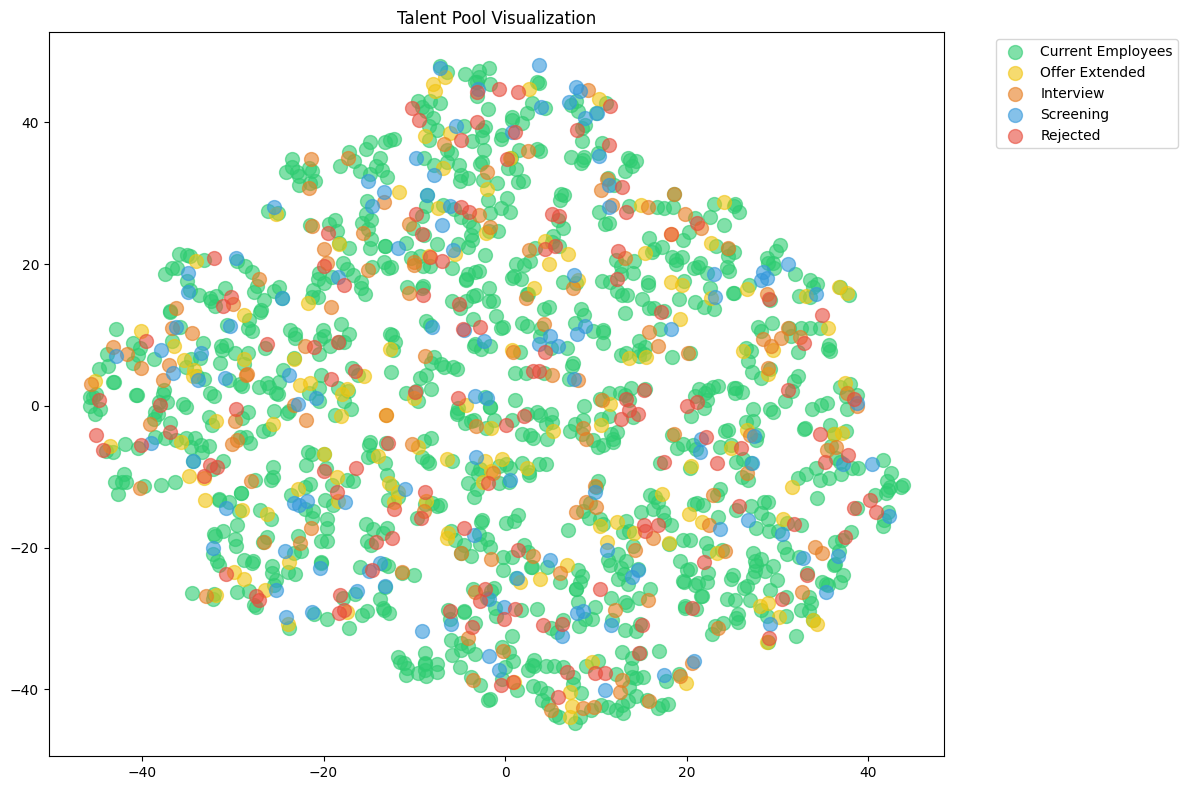


Creating geographical heatmap...
Geographical heatmap saved to 'geographic_heatmap.html'

Creating recruitment funnel...


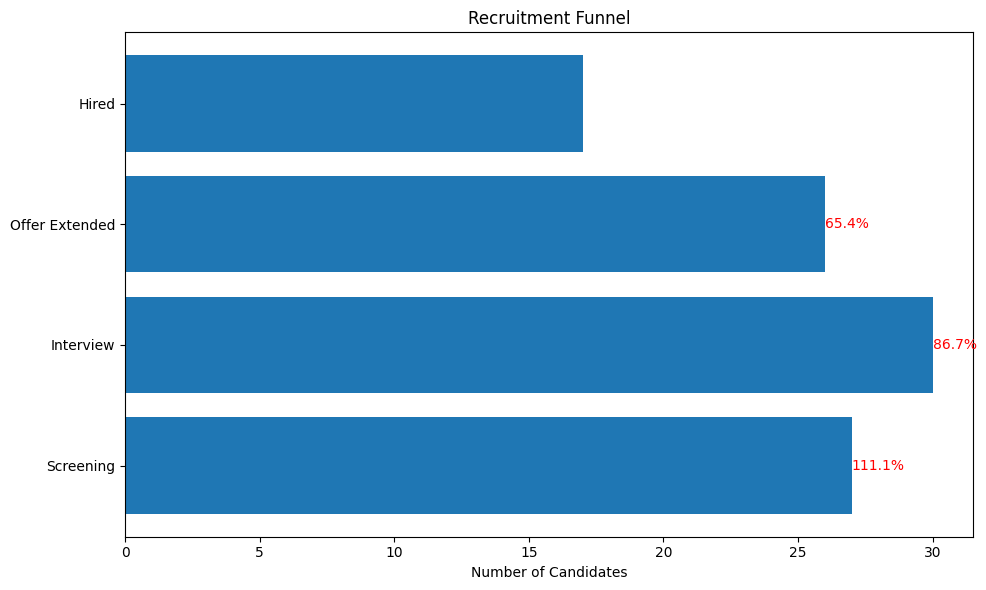


Analyzing specific locations...

Analysis for New York:
Current Employees: 242
Active Leads: 145

Creating location-specific talent pool...


/home/marty/repos/talent_track/app/functions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_employees_df['status'] = 'current_employee'


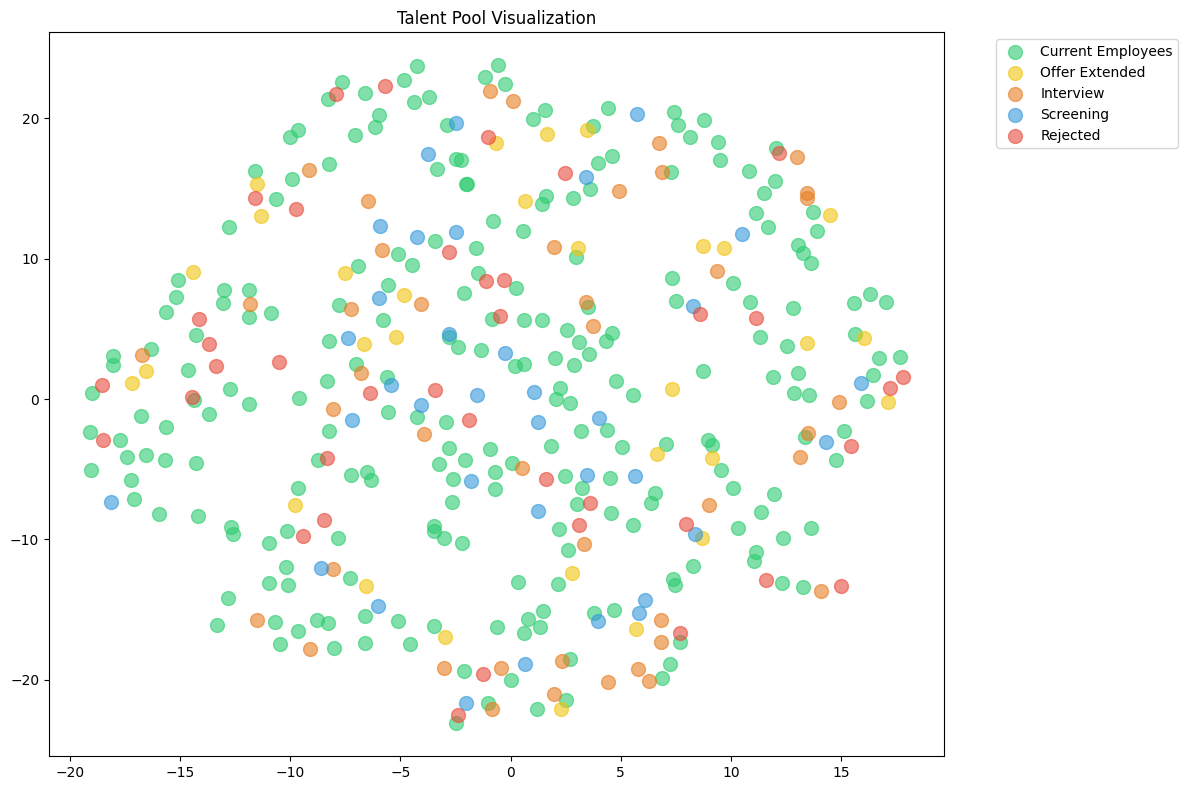


Analysis for San Francisco:
Current Employees: 253
Active Leads: 111

Creating location-specific talent pool...


/home/marty/repos/talent_track/app/functions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_employees_df['status'] = 'current_employee'


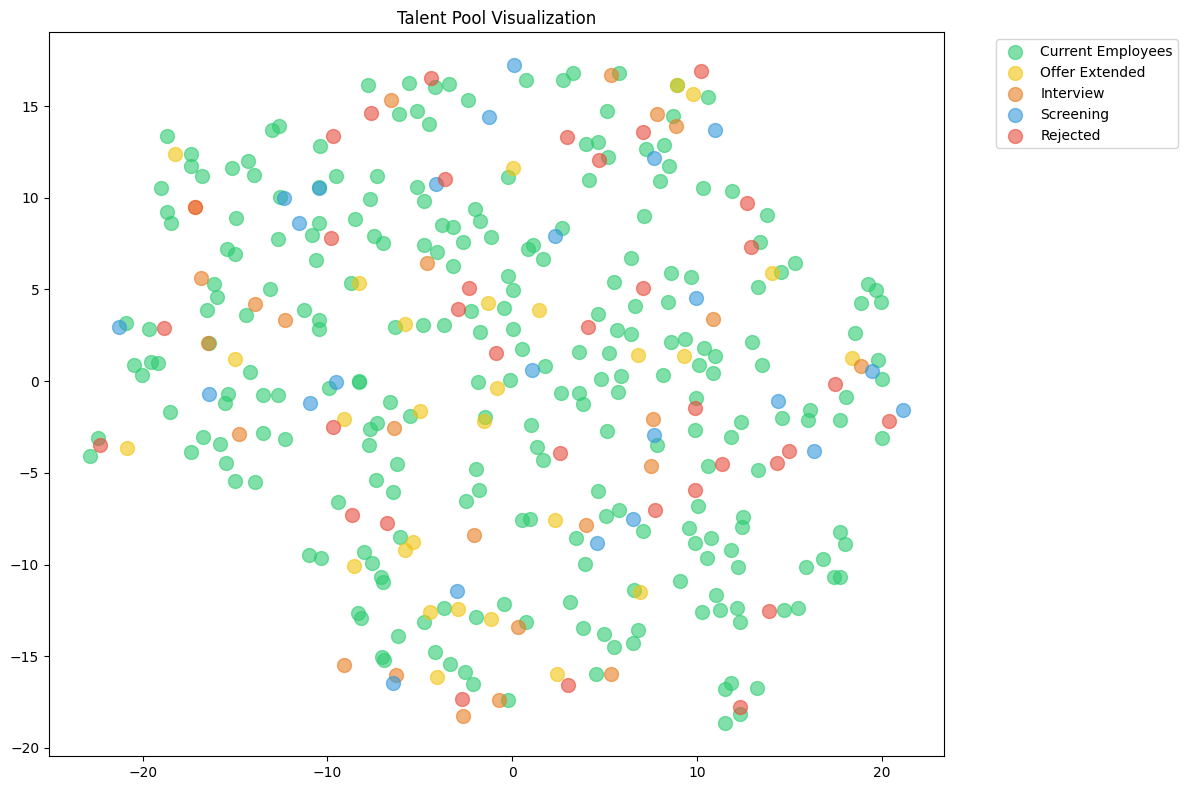


Analysis for London:
Current Employees: 250
Active Leads: 115

Creating location-specific talent pool...


/home/marty/repos/talent_track/app/functions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_employees_df['status'] = 'current_employee'


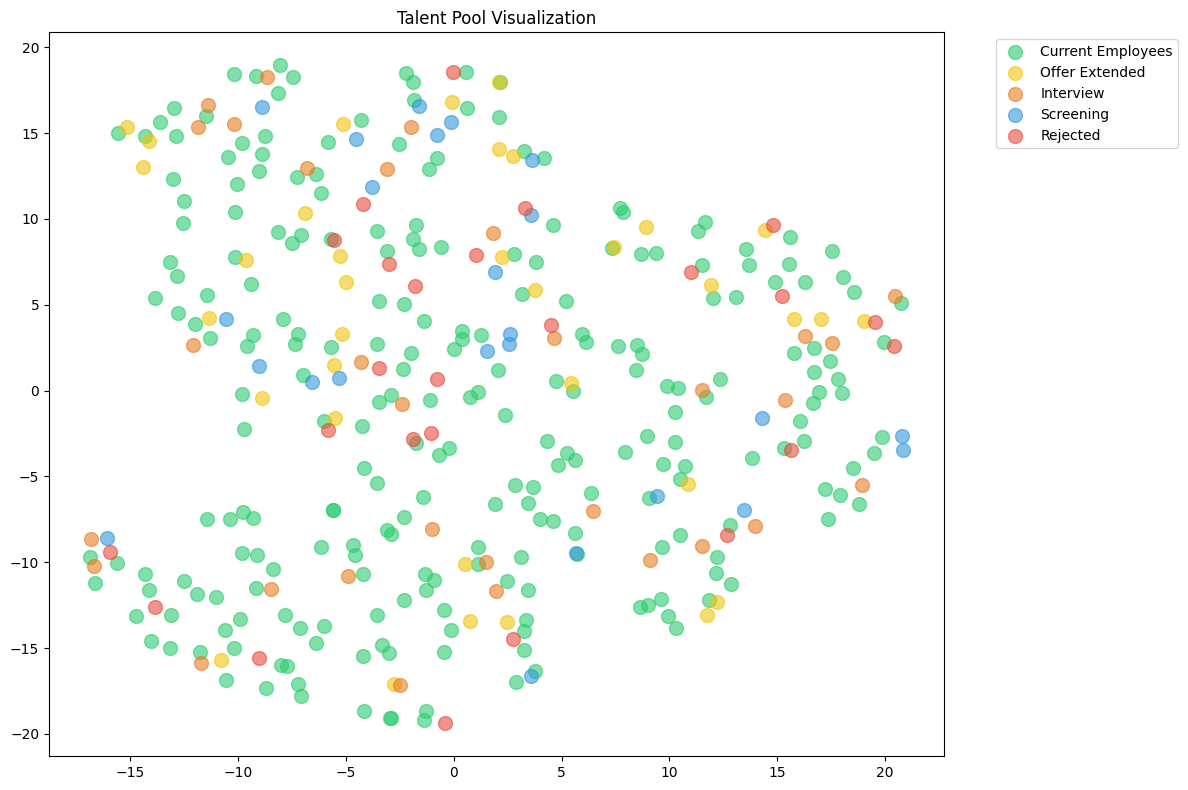


Analyzing recruitment pipeline...

Recruitment Pipeline Analysis:

Conversion Rates:
interview_to_offer: 0.00%

Lead Distribution by Status:
offer_extended: 133 (26.60%)
rejected: 131 (26.20%)
interview: 120 (24.00%)
screening: 116 (23.20%)

All tests completed!


In [5]:
print("Starting recruitment visualization tests...")
components = test_recruitment_visualizations()

# Example: Analyze specific locations
print("\nAnalyzing specific locations...")
for location in ['New York', 'San Francisco', 'London']:
    analyze_specific_location(components, location)

# Analyze recruitment pipeline
print("\nAnalyzing recruitment pipeline...")
analyze_recruitment_pipeline(components)

print("\nAll tests completed!")